In [16]:
import sys
sys.path.insert(1, '../../unseen')

import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fileio
import array_handling
import time_utils

## Forecast climatology

In [12]:
cafe_file = '/g/data/xv83/dbi599/seatac/data/tasmax_cafe-c5-d60-pX-f6_19950501-20201101_seatac.zarr.zip'

In [13]:
ds_forecast = fileio.open_file(cafe_file)

In [14]:
ds_forecast

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 52, lead_time: 3650)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-01 00:00:00 ... 2020-11-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
    time       (lead_time, init_date) object dask.array<chunksize=(1825, 26), meta=np.ndarray>
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 dask.array<chunksize=(1, 50, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Dec 01 14:03:45 2021: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

In [17]:
ds_forecast_selection = time_utils.select_time_period(ds_forecast, ['2004-01-01', '2020-12-31'])

In [26]:
clim_forecast = ds_forecast_selection.groupby('init_date.month').mean(['ensemble', 'init_date'])

In [27]:
clim_forecast = clim_forecast.compute()

In [28]:
clim_forecast

<xarray.Dataset>
Dimensions:    (lead_time: 3650, month: 2)
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * month      (month) int64 5 11
Data variables:
    tasmax     (month, lead_time) float32 11.09 11.15 11.1 ... 7.463 7.219 6.896

## Observations

In [29]:
obs_file = '/g/data/xv83/dbi599/seatac/data/tasmax_GHCNv2_1948-2021_seatac.zarr.zip'

In [30]:
ds_obs = fileio.open_file(obs_file)

### Stack method

In [31]:
ds_forecast.sizes['lead_time']

3650

In [32]:
obs_stacked = array_handling.stack_by_init_date(ds_obs,
                                                init_dates=ds_forecast['init_date'],
                                                n_lead_steps=ds_forecast.sizes['lead_time'])

In [33]:
obs_stacked

<xarray.Dataset>
Dimensions:    (init_date: 52, lead_time: 3650)
Coordinates:
  * init_date  (init_date) object 1995-05-14 00:00:00 ... 2020-11-14 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
    time       (init_date, lead_time) object 1995-05-14 00:00:00 ... nan
Data variables:
    tasmax     (init_date, lead_time) float32 dask.array<chunksize=(52, 3650), meta=np.ndarray>
Attributes: (12/22)
    Conventions:      CF-1.0
    climexp_url:      https://climexp.knmi.nl/gdcntmax.cgi?WMO=USW00024233
    comment:          
    contact_email:    ncdc.ghcnd@noaa.gov
    description:      SEATTLE TACOMA INTL AP, WA
    elevation:           113.0 m
    ...               ...
    station_code:     USW00024233
    station_country:  United States
    station_name:     SEATTLE_TACOMA_INTL_AP,_WA
    timestamp:        Mon Oct  4 03:26:54 2021
    title:            
    wmo_code:         72793

In [40]:
obs_stacked['time'].values[-1, 0:500]

array([cftime.DatetimeGregorian(2020, 11, 14, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 17, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 18, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 19, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 20, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 21, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 22, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 23, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 24, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11, 25, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2020, 11

In [34]:
obs_stacked_selection = time_utils.select_time_period(obs_stacked, ['2004-01-01', '2020-12-31'])

TypeError: '>=' not supported between instances of 'float' and 'cftime._cftime.DatetimeGregorian'

In [25]:
clim_obs = obs_stacked_selection.groupby('init_date.month').mean('init_date')

In [26]:
clim_obs

<xarray.Dataset>
Dimensions:    (lead_time: 3650, month: 2)
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * month      (month) int64 5 11
Data variables:
    tasmax     (month, lead_time) float32 19.2 16.7 20.55 ... 11.1 11.4 11.1

### Roll and duplicate method

In [202]:
#def daily_climatology(ds):
#    """Calculate the daily climatology"""
#    
#    clim = ds.groupby('time.dayofyear').mean('time')
#    
#    max_day = int(clim['dayofyear'].values.max())
#    assert max_day in [365, 366]
#    if max_day == 366:
#        noleap_idx = np.delete(np.arange(0, 366), 59)
#        clim = clim.isel({'dayofyear': noleap_idx})
#        clim = clim.assign_coords({'dayofyear': np.arange(1, 366)})
#    
#    return clim

#TODO: Add time period selection

In [194]:
#clim_obs = daily_climatology(ds_obs)

In [195]:
#clim_obs

<xarray.Dataset>
Dimensions:    (dayofyear: 365)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Data variables:
    tasmax     (dayofyear) float32 6.943 6.622 6.588 6.699 ... 6.704 6.834 5.989

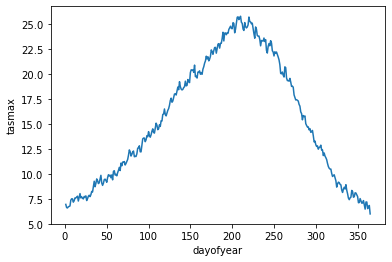

In [196]:
#clim_obs['tasmax'].plot()
#plt.show()

In [203]:
#def roll_daily_climatology(clim, forecast_ds):
#    """Roll observed daily climatology to match forecast initial dates"""
#    
#    n_lead_times = forecast_ds['lead_time'].size
#    n_cycles = n_lead_times / 365
#    assert n_cycles.is_integer()
#    
#    init_months = np.unique(forecast_ds['init_date'].dt.month.values)
#    init_daysofyear = forecast_ds['init_date'].dt.dayofyear.values[0:len(init_months)]
#    rolled_clim_list = []
#    for month, dayofyear in zip(init_months, init_daysofyear):
#        roll_number = 365 - (dayofyear - 1)
#        clim_shifted = clim.roll(dayofyear=roll_number, roll_coords=True)
#        first_day = int(clim_shifted['dayofyear'][0])
#        assert first_day == dayofyear
#        clim_shifted = clim_shifted.rename({'dayofyear': 'lead_time'})
#        clim_shifted = xr.concat([clim_shifted]*int(n_cycles), dim='lead_time')
#        clim_shifted = clim_shifted.assign_coords({'lead_time': ds['lead_time']})
#        clim_shifted = clim_shifted.assign_coords({'month': month})
#        rolled_clim_list.append(clim_shifted)
#    rolled_clim = xr.concat(rolled_clim_list, dim='month')
#        
#    return rolled_clim

In [204]:
#clim_obs_rolled = roll_daily_climatology(clim_obs, ds)

In [205]:
#clim_obs_rolled

<xarray.Dataset>
Dimensions:    (lead_time: 3650, month: 2)
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * month      (month) int64 5 11
Data variables:
    tasmax     (month, lead_time) float32 15.81 16.08 16.36 ... 12.47 12.65

## Plots

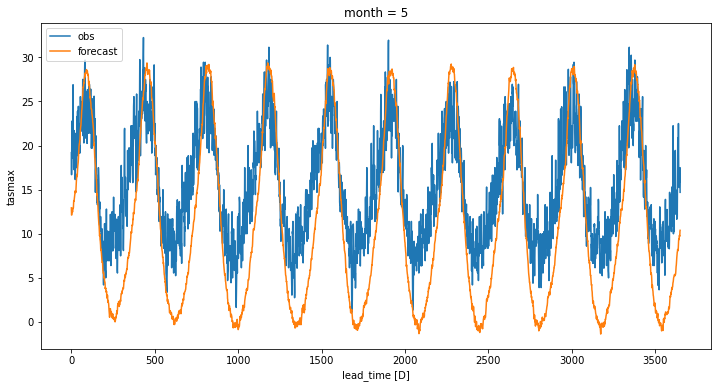

In [27]:
plt.figure(figsize=[12,6])
#clim_obs_rolled['tasmax'].isel({'month': 0}).plot(label='obs')
clim_obs['tasmax'].isel({'month': 0}).plot(label='obs')
clim_forecast['tasmax'].isel({'month': 0}).plot(label='forecast')
plt.legend()
plt.show()

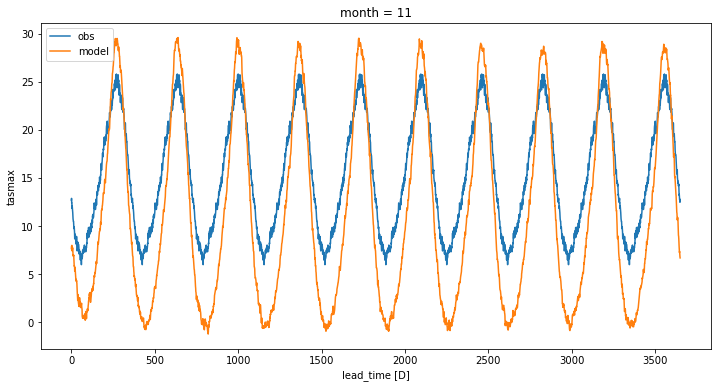

In [207]:
plt.figure(figsize=[12,6])
clim_obs_rolled['tasmax'].isel({'month': 1}).plot(label='obs')
clim_forecast['tasmax'].isel({'month': 1}).plot(label='model')
plt.legend()
plt.show()

In [212]:
bias = clim_forecast['tasmax'] - clim_obs_rolled['tasmax']

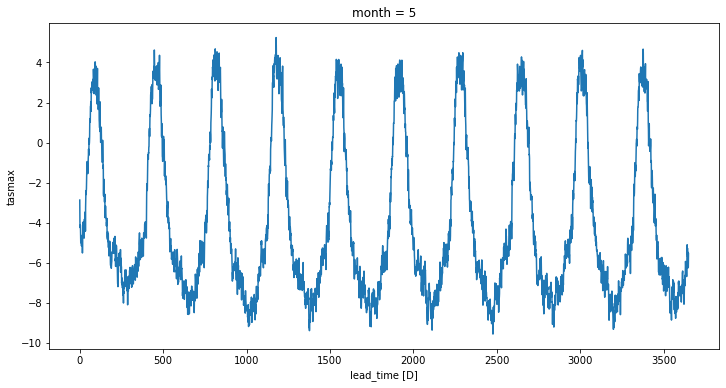

In [218]:
plt.figure(figsize=[12,6])
bias.isel({'month': 0}).plot()
plt.show()

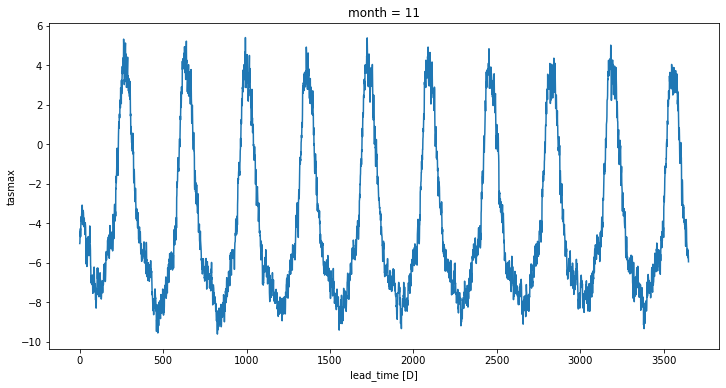

In [219]:
plt.figure(figsize=[12,6])
bias.isel({'month': 1}).plot()
plt.show()

The seasonal cycle of tmax is greater in the model so (relative to obs) the bias is positive in the summer and negative in winter.